In [ ]:
import pandas as pd                    #импортируем нужные библиотеки
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('Исходные данные.csv')    #считываем данные из файла
df

<ipython-input-23-a78401b538ce>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Исходные данные.csv')    #считываем данные из файла


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


Вариант 2

1. Вывести информацию о наборе данных.

In [ ]:
df.info()    #выводим информацию о наборе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

2. Определить наличие ошибочных записей в признаках.
Исправить ошибочные записи, либо заменить ошибочные записи пропусками.

image.png

In [ ]:
df['Annual_Income'][:20]    #смотрим первые 20 записей

0      19114.12
1      19114.12
2      19114.12
3      19114.12
4      19114.12
5      19114.12
6      19114.12
7      19114.12
8      34847.84
9      34847.84
10    34847.84_
11     34847.84
12     34847.84
13     34847.84
14     34847.84
15     34847.84
16    143162.64
17    143162.64
18    143162.64
19    143162.64
Name: Annual_Income, dtype: object

In [ ]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')     #избавляемся от "_"
df['Annual_Income'][:20]

0      19114.12
1      19114.12
2      19114.12
3      19114.12
4      19114.12
5      19114.12
6      19114.12
7      19114.12
8      34847.84
9      34847.84
10     34847.84
11     34847.84
12     34847.84
13     34847.84
14     34847.84
15     34847.84
16    143162.64
17    143162.64
18    143162.64
19    143162.64
Name: Annual_Income, dtype: object

3. В соответствии с вариантом преобразовать признаки, которые должны быть количественными в числовой формат.

In [ ]:
df['Annual_Income'] = df['Annual_Income'].astype(float)      #меняем формат признака на числовой
df['Annual_Income'].dtype

dtype('float64')

4. Для всех вариантов преобразовать признак "Credit_History_Age" в числовой формат (месяцы).

In [ ]:
dict_month = {'January':1,'February':2,'March':3,'April':4,'May':5,            #создаем словарь для замены значений столбца
              'June':6,'July':7,'August':8,'September':9,'October':10,
              'November':11,'December':12,}
df['New_Month'] = df['Month'].replace(dict_month)          #заменяем названия месяцев на номер
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,New_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor,4
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor,5
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor,6
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard,7


In [ ]:
def months(value):         #функция для изменения данных в столбце
  if pd.isna(value):
    return None
  return int(value.split(' ')[0]) * 12
df['Credit_History_Age'] = df['Credit_History_Age'].apply(months)        #применяем функцию к нашим данным
df['Credit_History_Age']

0        264.0
1          NaN
2        264.0
3        264.0
4        264.0
         ...  
99995    372.0
99996    372.0
99997    372.0
99998    372.0
99999    372.0
Name: Credit_History_Age, Length: 100000, dtype: float64

In [ ]:
median_bins = df.groupby('Customer_ID')['Credit_History_Age'].transform('median')  #находим медиану для каждой группы
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(median_bins)     #заменяем пропущенные данные на медиану каждой группы
df['Credit_History_Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [ ]:
df['Credit_History_Age'] = df['Credit_History_Age'] + df['New_Month']      #складываем значения столбцов
df['Credit_History_Age']

0        265.0
1        266.0
2        267.0
3        268.0
4        269.0
         ...  
99995    376.0
99996    377.0
99997    378.0
99998    379.0
99999    380.0
Name: Credit_History_Age, Length: 100000, dtype: float64

In [ ]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype(int)     #меняем формат на целочисленный
df['Credit_History_Age'].dtype              #проверяем формат

dtype('int64')

5. Определить наличие аномальных значений, которые не соответствуют физической природе признаков.

image.png


Заменить аномальные значения пропусками.

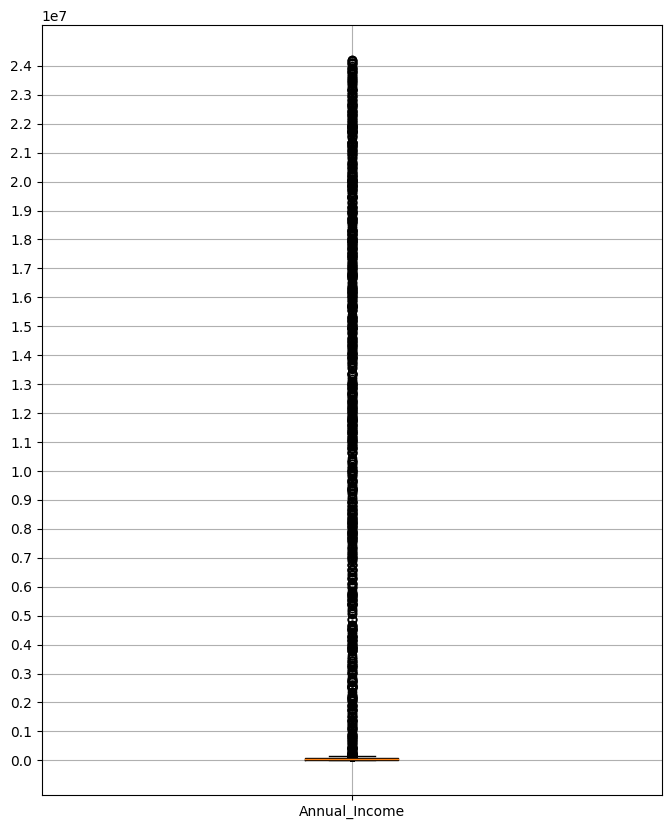

In [ ]:
plt.figure(figsize = (8,10))              #создаем фигуру
plt.boxplot(df['Annual_Income'], labels = ['Annual_Income'])     #создаем "ящик с усами"
plt.yticks(np.arange(0,25000000,1000000));           #задаем значения по оси y
plt.grid()            #выводим сетку

In [ ]:
Q1 = df['Annual_Income'].quantile(0.25)   #вычисляем первый и третий квартили для годового дохода
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1    #вычисляем межквартильный размах

# Определяем границы выбросов значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Заменяем аномальные значения на NaN
df['Annual_Income'] = np.where((df['Annual_Income'] < lower_bound) | (df['Annual_Income'] > upper_bound), np.nan, df['Annual_Income'])
df['Annual_Income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Annual_Income
Non-Null Count  Dtype  
--------------  -----  
97217 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


6. Восстановить пропущенные значения признака.
Сравнить распределения признака до и после восстановления.

Для всех вариантов восстановить пропущенные значения признака Type_of_Loan.

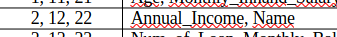

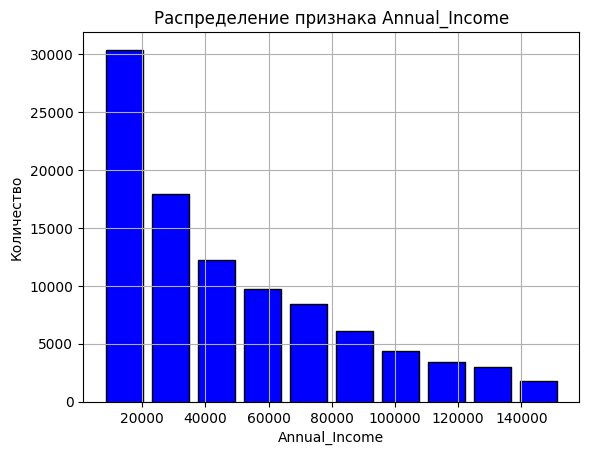

In [ ]:
plt.hist(df['Annual_Income'], bins = 10, rwidth = 0.8, edgecolor = 'black', color = 'b')   #строим гистограмму
plt.xlabel('Annual_Income')     #добавляем подписи к осям
plt.ylabel('Количество')
plt.title('Распределение признака Annual_Income')      #добавляем название графика
plt.grid()       #добавляем сетку

In [ ]:
df['Annual_Income'].info()    #выводим информацию о столбце

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Annual_Income
Non-Null Count  Dtype  
--------------  -----  
97217 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [ ]:
df_median = df.copy()      #копируем датафрейм для сравнения распределений
median_bins = df.groupby('Customer_ID')['Annual_Income'].transform('median')    #создаем серию с медианными значениями
df_median['Annual_Income'] = df_median['Annual_Income'].fillna(median_bins)     #восстанавливаем пропуски с помощью медианы
df_median['Annual_Income'].info()              #проверяем наличие пропусков

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Annual_Income
Non-Null Count  Dtype  
--------------  -----  
98200 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [ ]:
df_median['Annual_Income'] = df_median['Annual_Income'].fillna(df_median['Annual_Income'].median())  #оставшиеся пропуски заполняем медианой по всему признаку
df_median['Annual_Income'].info()   #проверяем наличие пропусков

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Annual_Income
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


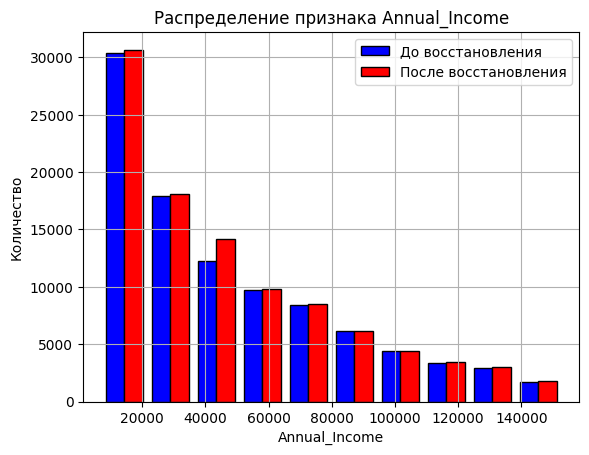

In [ ]:
plt.hist([df['Annual_Income'], df_median['Annual_Income']], color = ['b', 'r'], edgecolor = 'black', rwidth = 0.8)   #строим распределение "до" и "после"
plt.xlabel('Annual_Income')   #добавляем подписи к осям
plt.ylabel('Количество')
plt.title('Распределение признака Annual_Income')    #добавляем заголовок графика
plt.grid()       #добавляем сетку
plt.legend(['До восстановления', 'После восстановления'])   #добавляем легенду

In [ ]:
df['Name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
90015 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [ ]:
df['Name'] = df.groupby('Customer_ID')['Name'].transform(lambda x: x.fillna(x.value_counts().idxmax()))   #заменяем пропуски на самое часто встречаемое значение
df['Name'].info() #смотрим, остались ли пропуски

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Name
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [ ]:
df['Type_of_Loan'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Type_of_Loan
Non-Null Count  Dtype 
--------------  ----- 
88592 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [ ]:
df_new = df.copy()     #копируем DataFrame для кодирования признака, чтобы посчитать встречаемость каждого типа кредита
df_new['Type_of_Loan'] = df_new['Type_of_Loan'].str.replace('and','')      #убираем "and" из значений признака
df_new['Type_of_Loan'] = df_new['Type_of_Loan'].str.strip().str.replace(" ", "")    #разбиваем значения по пробелам

df_new_encoded = df_new['Type_of_Loan'].str.get_dummies(sep=',')      #выбираем все возможные уникальные значения из признака, разделенные запятой, и создаем новый датафрейм с кодированием этих значений признака

df_new = pd.concat([df_new, df_new_encoded], axis=1)   #совмещаем два датафрейма
df_new

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,New_Month,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,1,1,1,0,1,0,0,0,1,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,2,1,1,0,1,0,0,0,1,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,3,1,1,0,1,0,0,0,1,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4,1,1,0,1,0,0,0,1,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,5,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,4,1,0,0,0,0,0,0,0,1
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,5,1,0,0,0,0,0,0,0,1
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,6,1,0,0,0,0,0,0,0,1
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7,1,0,0,0,0,0,0,0,1


In [ ]:
df_new[['AutoLoan','Credit-BuilderLoan','DebtConsolidationLoan','HomeEquityLoan','MortgageLoan','NotSpecified','PaydayLoan','PersonalLoan','StudentLoan']].sum()  #смотрим, какой кредит встречается чаще всего

AutoLoan                 30560
Credit-BuilderLoan       31728
DebtConsolidationLoan    31040
HomeEquityLoan           31400
MortgageLoan             31360
NotSpecified             31680
PaydayLoan               31944
PersonalLoan             31104
StudentLoan              31040
dtype: int64

In [ ]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('PaydayLoan')    #заменяем пропуски индикаторным методом
df['Type_of_Loan'].info()     #смотрим, остались ли пропуски

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Type_of_Loan
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


7. Определить наличие статистических выбросов.
Использовать графический и статистический методы.

image.png

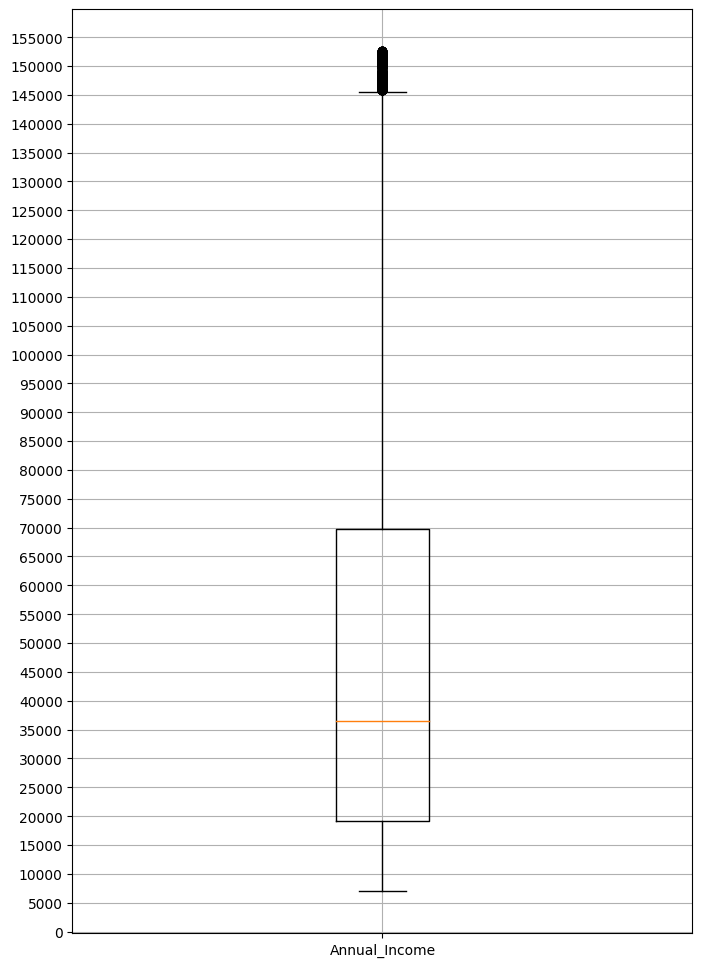

In [ ]:
plt.figure(figsize=(8,12))     #задаем размер фигуры
plt.boxplot(df['Annual_Income'][~df['Annual_Income'].isna()], labels = ['Annual_Income'])    #строим боксплот
plt.yticks(np.arange(0,160000, 5000))    #задаем значения по оси y
plt.grid();      #добавляем сетку на график

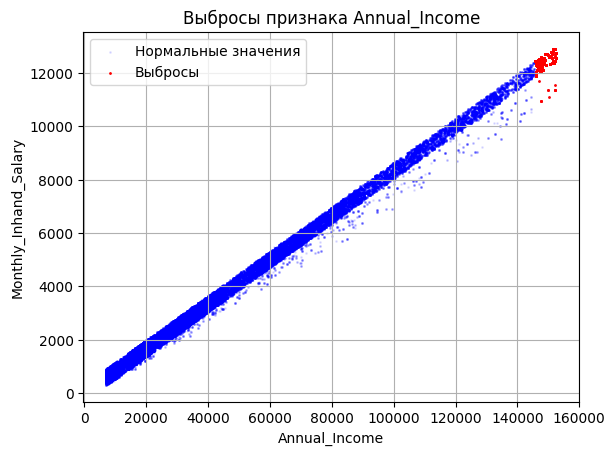

In [ ]:
Q1 = df['Annual_Income'].quantile(0.25)   #вычисляем первый и третий квартили для годового дохода
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1  #вычисляем межквартильный размах

# Определяем границы выбросов значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Annual_Income'] < lower_bound) | (df['Annual_Income'] > upper_bound)]   #выборка строк с выбросами

plt.scatter(df['Annual_Income'], df['Monthly_Inhand_Salary'], label='Нормальные значения', s = 1, c='b', alpha=0.1)  #строим рафик всех точек
plt.scatter(outliers['Annual_Income'], outliers['Monthly_Inhand_Salary'], color='red', label='Выбросы', s=1)  #строим график выбросов
plt.xlabel('Annual_Income')         #добавляем подписи к осям
plt.ylabel('Monthly_Inhand_Salary')
plt.title('Выбросы признака Annual_Income')    #добавляем заголовок
plt.xticks(np.arange(0,180000,20000))    #устанавливаем значения меток по оси x
plt.grid()      #добавляем сетку
plt.legend()

8. Закодировать категориальные признаки.

image.png

In [ ]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and','')      #убираем "and" из значений признака
df['Type_of_Loan'] = df['Type_of_Loan'].str.strip().str.replace(" ", "")    #разбиваем значения по пробелам

df_encoded = df['Type_of_Loan'].str.get_dummies(sep=',')      #выбираем все возможные уникальные значения из признака, разделенные запятой, и создаем новый датафрейм с кодированием этих значений признака

df = pd.concat([df, df_encoded], axis=1)   #совмещаем два датафрейма
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,New_Month,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,1,1,1,0,1,0,0,0,1,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,2,1,1,0,1,0,0,0,1,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,3,1,1,0,1,0,0,0,1,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4,1,1,0,1,0,0,0,1,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,5,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,4,1,0,0,0,0,0,0,0,1
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,5,1,0,0,0,0,0,0,0,1
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,6,1,0,0,0,0,0,0,0,1
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7,1,0,0,0,0,0,0,0,1


9. Определить эмпирическое распределение признака, подобрать теоретическое распределение и оценить степень их близости.
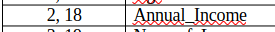

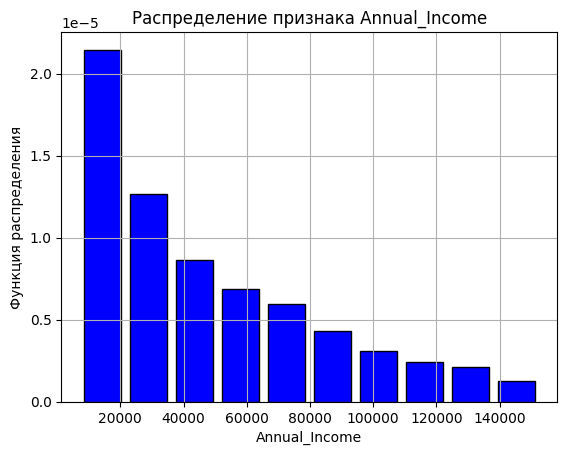

In [ ]:
plt.hist(df['Annual_Income'], bins = 10, rwidth = 0.8, edgecolor = 'black', color='b', density = True)  #строим эмпирическое распределение
plt.xlabel('Annual_Income')   #добавляем подписи к осям
plt.ylabel('Функция распределения')
plt.title('Распределение признака Annual_Income')   #добавляем заголовок
plt.grid()    #добавляем сетку

In [ ]:
Annual_Income_mean = df['Annual_Income'].mean()    #находим математическое ожидание
Annual_Income_std = df['Annual_Income'].std()      #находим стандартное отклонение
Annual_Income_expon = sts.expon.rvs(Annual_Income_mean, Annual_Income_std, size = 200) #генерируем случайные числа из экспоненциального распределения
#с заданными средним значением и стандартным отклонением
Annual_Income_expon = np.sort(Annual_Income_expon)   #сортируем сгенерированные случайные числа по возрастанию
expon_pdf = sts.expon.pdf(Annual_Income_expon, Annual_Income_mean, Annual_Income_std)   #вычисляем значения функции плотности вероятности

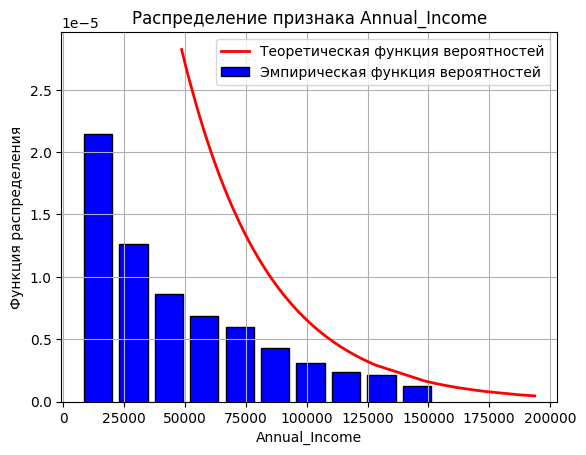

In [ ]:
plt.plot(Annual_Income_expon, expon_pdf, lw = 2, c = 'r')     #строим теоретическое распределение
plt.hist(df['Annual_Income'], bins = 10, rwidth = 0.8, edgecolor = 'black', color='b', density = True)   #строим эмпирическое распределение
plt.xlabel('Annual_Income')    #добавляем подписи к осям
plt.ylabel('Функция распределения')
plt.title('Распределение признака Annual_Income')    #добавляем заголовок
plt.grid()    #добавляем сетку
plt.legend(['Теоретическая функция вероятностей','Эмпирическая функция вероятностей'])    #добавляем легенду

Можно сказать, что распределения достаточно близки между собой.

10. Выбрать любые два количественных признака и оценить наличие и степень их зависимости.
Провести визуальный анализ зависимости. Сделать вывод.
Написать функции для расчета коэффициента корреляции Пирсона, Спирмена, Кендалла.
Вычислить требуемые коэффициенты с использованием написанных функций и встроенных средств Python. Сделать вывод.

In [ ]:
df['Annual_Income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Annual_Income
Non-Null Count  Dtype  
--------------  -----  
97217 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [ ]:
df['Monthly_Inhand_Salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Monthly_Inhand_Salary
Non-Null Count  Dtype  
--------------  -----  
84998 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


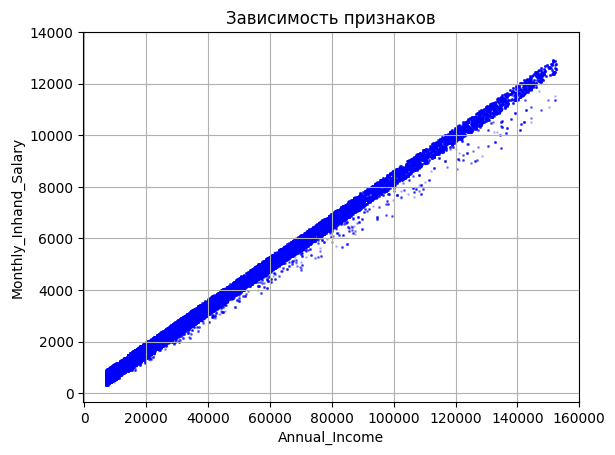

In [ ]:
plt.scatter(df['Annual_Income'], df['Monthly_Inhand_Salary'],  alpha = 0.2, s = 1, c='b')   #строим точечный график зависимости признаков
plt.xlabel('Annual_Income')     #добавляем подписи к осям
plt.ylabel('Monthly_Inhand_Salary')
plt.title('Зависимость признаков')     #добавляме заголовок
plt.xticks(np.arange(0,180000, 20000))    #устанавливаем метки по осям
plt.yticks(np.arange(0,16000, 2000))
plt.grid()          #добавляем сетку

По визуальному анализу можно сделать вывод, что признаки определенно имеют зависимость.

Коэффициент корреляции Пирсона:

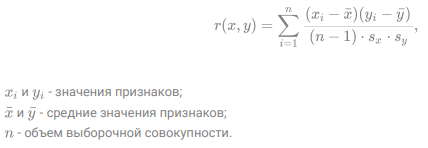

In [ ]:
def pearson_corr(df, column1, column2):
  df1 = df.copy()
  df1 = df1[[column1, column2]].dropna()
  #расчет средних значений признака
  means1 = df1[column1].sum() / df1[column1].count()
  means2= df1[column2].sum() / df1[column2].count()

  #расчет стандартных отклонений
  std_annual = ((((df1[column1] - means1)**2).sum())/(df1[column1].count()-1))**0.5
  std_monthly = ((((df1[column2] - means2)**2).sum())/(df1[column2].count()-1))**0.5

  #расчет коэффициента корреляции Пирсона
  pearson_coef = (((df1[column1] - means1)*(df1[column2] - means2)).sum()) / ((df1[column1].count()-1) * std_annual * std_monthly)
  return pearson_coef
pearson_corr(df, 'Annual_Income', 'Monthly_Inhand_Salary')

0.9978854513905452

In [ ]:
df[['Annual_Income','Monthly_Inhand_Salary']].corr(method = 'pearson')  #находим коэффициент корреляции Пирсона с помощью встроенной функции

,Annual_Income,Monthly_Inhand_Salary
Annual_Income,1.000000,0.997885
Monthly_Inhand_Salary,0.997885,1.000000


Коэффициент корреляции Спирмена:

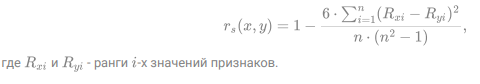

In [ ]:
def spearman_corr(df, column1, column2):
  df1 = df.copy()
  df1 = df1[[column1, column2]].dropna()
  #вычисляем ранги для значений в каждом столбце
  df1['rank_annual'] = df1[column1].rank(method='average')
  df1['rank_monthly'] = df1[column2].rank(method='average')

  #вычисляем разности рангов
  df1['d_squared'] = (df1['rank_annual'] - df1['rank_monthly']) ** 2

  #расчет коэффициента корреляции Спирмена
  n = len(df1)
  spearman_coef = 1 - (6 * df1['d_squared'].sum()) / (n * (n**2 - 1))
  return spearman_coef
spearman_corr(df, 'Annual_Income', 'Monthly_Inhand_Salary')

0.9941061859303031

In [ ]:
df[['Annual_Income','Monthly_Inhand_Salary']].corr(method = 'spearman') #находим коэффициент корреляции Спирмана с помощью встроенной функции

,Annual_Income,Monthly_Inhand_Salary
Annual_Income,1.000000,0.994106
Monthly_Inhand_Salary,0.994106,1.000000


Коэффициент корреляции Кендалла:

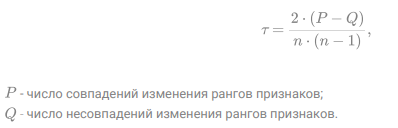

In [ ]:
def kendall_corr(df,x, y):
  df1 = df.copy()
  df1 = df1[[x, y]].dropna()
  n = len(df1)   #получаем количество элементов в массивах
  concordant = 0   #счетчик согласованных пар
  discordant = 0  #счетчик несогласованных пар
  #преобразуем столбцы в массивы NumPy
  x = np.array(df1[x])
  y = np.array(df1[y])
  for i in range(n):     #проходимся по всем элементам массивов
      #сравниваем пары (x[i], y[i]) со всеми последующими парами (x[j], y[j]), где j > i
      concordant += np.sum(((x[i] - x[i+1:]) * (y[i] - y[i+1:]) > 0))    #увеличиваем счетчик согласованных пар
      discordant += np.sum(((x[i] - x[i+1:]) * (y[i] - y[i+1:]) < 0))    #увеличиваем счетчик несогласованных пар
  kendall_coef = (2*(concordant - discordant)) / (n * (n - 1))    #вычисляем коэффициент корреляции Кендалла
  return kendall_coef


kendall_corr(df,'Annual_Income', 'Monthly_Inhand_Salary')

0.9387729414574397

In [ ]:
df[['Annual_Income','Monthly_Inhand_Salary']].corr(method = 'kendall')   #находим коэффициент корреляции Кендалла с помощью встроенной функции

,Annual_Income,Monthly_Inhand_Salary
Annual_Income,1.000000,0.938839
Monthly_Inhand_Salary,0.938839,1.000000


По значениям всех коэфициентов можно сделать вывод, что признаки имеют сильную положительную корреляцию, а значит, зависимы.

11. Выбрать любой количественный и категориальный (с 3-мя и более категориями) признаки и оценить наличие и степень их зависимости. Использовать графический метод и показатели зависимости.
Провести визуальный анализ на основе сравнения гистограмм, графиков функций распределения, графиков "ящик с усами". Сделать вывод.
Написать функцию для расчета корреляционного отношения.
Вычислить корреляционное отношение с использованием написанной функции. Сделать вывод.

<Figure size 1000x1500 with 0 Axes>

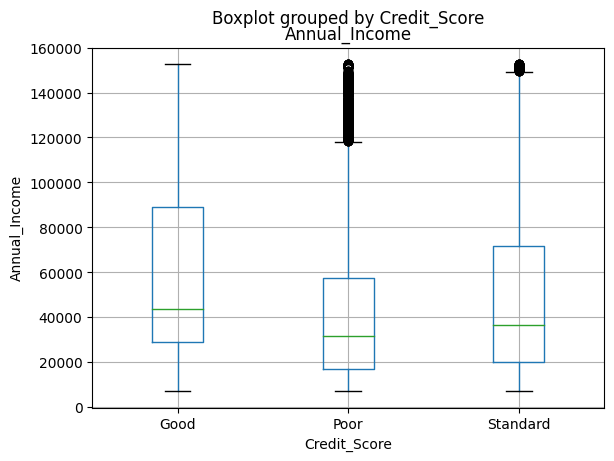

In [ ]:
plt.figure(figsize=(10,15))    #задаем размеры фигуры
df.boxplot('Annual_Income', by = 'Credit_Score')   #строим боксплот
plt.yticks(np.arange(0,180000,20000))     #устанавливаем метки по оси y
plt.ylabel('Annual_Income');      #добавляем подпись к оси y

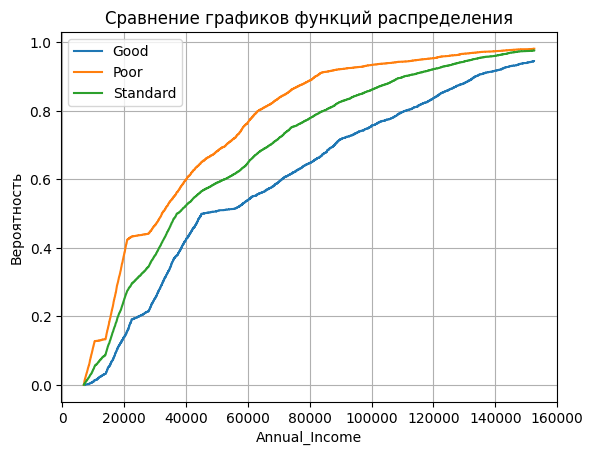

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF  #импортируем класс ECDF для построения эмпирической функции распределения
ecdf_g = ECDF(df['Annual_Income'][df['Credit_Score']=='Good'])   #создаем объекты ECDF (эмпирические функции распределения) для каждой категории кредитного рейтинга
ecdf_p = ECDF(df['Annual_Income'][df['Credit_Score']=='Poor'])
ecdf_s = ECDF(df['Annual_Income'][df['Credit_Score']=='Standard'])

plt.step(ecdf_g.x, ecdf_g.y)     #строим графики эмпирических функций распределения
plt.step(ecdf_p.x, ecdf_p.y)
plt.step(ecdf_s.x, ecdf_s.y)

plt.legend(['Good', 'Poor', 'Standard'])    #добавлем легенду
plt.xticks(np.arange(0,180000,20000))     #устанавливаем значения меток по оси x
plt.xlabel('Annual_Income')      #добавляем подписи к осям
plt.ylabel('Вероятность')
plt.title('Сравнение графиков функций распределения')    #добавляем заголовок
plt.grid()         #добавляем сетку

Text(0.5, 1.0, 'Зависимость признаков Annual_Income и Credit_Score')

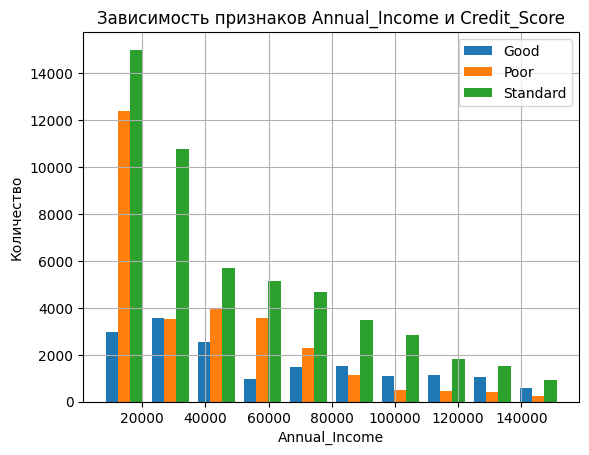

In [ ]:
df_good = df['Annual_Income'][df['Credit_Score']=='Good']     #фильтруем DataFrame и получаем значения 'Annual_Income' для каждой категории 'Credit_Score'
df_poor = df['Annual_Income'][df['Credit_Score']=='Poor']
df_standard = df['Annual_Income'][df['Credit_Score']=='Standard']

plt.hist([df_good, df_poor, df_standard])    #строим гистограмму для каждой выборки
plt.legend(['Good', 'Poor', 'Standard'])    #добавляем легенду
plt.grid()        #добавляем сетку
plt.xlabel('Annual_Income')       #добавляем подписи к осям
plt.ylabel('Количество')
plt.title('Зависимость признаков Annual_Income и Credit_Score')     #добавляем заголовок

По графикам можно сказать, что присутствует небольшая зависимость признаков.

In [ ]:
def correlation_ratio(df, quantitative_col, categorical_col):
  total_mean = df[quantitative_col].mean() #вычисляем среднее значение количественного признака
  groups = df.groupby(categorical_col)[quantitative_col] #группируем данные в DataFrame по категориальному признаку
   #и выбираем столбец с количественным признаком для каждой группы

  sst = ((df[quantitative_col] - total_mean)**2).sum()  #вычисляем общую сумму квадратов отклонений значений количественного признака от общего среднего

  ssw = ((groups.transform('mean') - df[quantitative_col])**2).sum()  #вычисляем сумму квадратов отклонений значений количественного признака от средних значений внутри каждой группы

  return np.sqrt((sst - ssw) / sst)  #вычисляем корреляционное отношение по формуле и возвращаем его значение


correlation_ratio(df, 'Annual_Income', 'Credit_Score')


0.19919950403088713

Результат выполнения функции для расчета корреляционного отношения так же показал небольшую зависимость между признаками.

12. Выбрать любые два категориальных признака и оценить наличие и степень их зависимости.
Провести визуальный анализ зависимости. Сделать вывод.
Написать функции для расчета коэффициента ассоциации, коэффициента контингенции, коэффициента взаимной сопряженности Чупрова, коэффициента взаимной сопряженности Пирсона.
Вычислить требуемые коэффициенты с использованием написанных функций. Сделать вывод.

In [ ]:
df['Credit_Score'].unique()     #смотрим уникальные значения признака

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
df['Occupation'].unique()       #смотрим уникальные значения признака

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
df['Occupation'] = np.where(df['Occupation']=='_______', np.nan, df['Occupation'])    #избавляемся от ошибочных записей
df['Occupation'].unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
oc_g = df['Occupation'][df['Credit_Score'] == 'Good'].value_counts(normalize = True)    #считаем, как часто встречается каждая категория, для которой значение Credit_Mix = Good
oc_s = df['Occupation'][df['Credit_Score'] == 'Standard'].value_counts(normalize = True)  #считаем, как часто встречается каждая категория, для которой значение Credit_Mix = Standard
oc_p = df['Occupation'][df['Credit_Score'] == 'Poor'].value_counts(normalize = True)   #считаем, как часто встречается каждая категория, для которой значение Credit_Mix = Poor

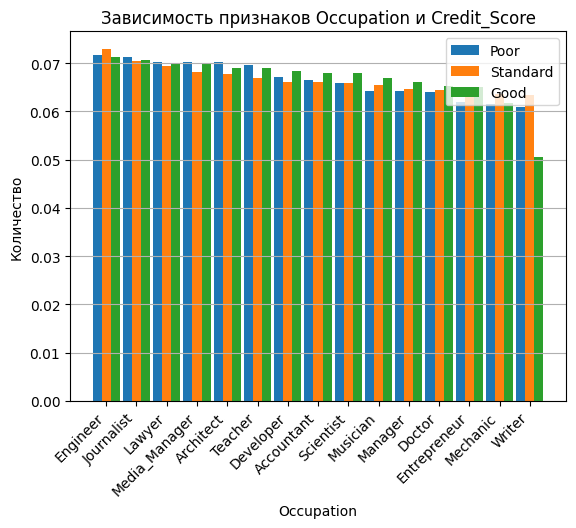

In [ ]:
x = np.arange(len(oc_g.index))     #задаем переменную для значений оси x
w = 0.6          #задем переменную для ширины столбцов

plt.bar(x - w/2, oc_p.values, width=w/2, label = 'Poor')    #строим столбчатую диаграмму для каждого полученного ранее набора
plt.bar(x, oc_s.values, width=w/2, label = 'Standard')
plt.bar(x + w/2, oc_g.values, width=w/2, label = 'Good')

plt.xticks(x, oc_g.index, rotation=45, ha='right')    #добавляем подписи меток по оси x
plt.xlabel('Occupation')     #добавляем подписи осей
plt.ylabel('Количество')
plt.title('Зависимость признаков Occupation и Credit_Score')    #добавляем заголовок
plt.legend()       #добавляем легенду
plt.grid(axis='y')     #добавляем сетку для оси y

В результате визуального анализа не было найдено определенной сильной зависимости между признаками.

In [ ]:
#Коэффициента ассоциации и контигенции в данном случае не будет, так как они применяются только тогда, когда оба признака имеют ровно 2 значения
def association(cont):
  K_a = (cont.iloc[0,0]*cont.iloc[1,1] - cont.iloc[0,1]*cont.iloc[1,0]) /\
  (cont.iloc[0,0]*cont.iloc[1,1]+cont.iloc[0,1]*cont.iloc[1,0])
  return K_a

def contingent(cont):
  h = (cont.iloc[0,0]*cont.iloc[1,1]-cont.iloc[0,1]*cont.iloc[1,0])
  z = np.sort((cont.iloc[2,0]*cont.iloc[2,1])*(cont.iloc[0,1]*cont.iloc[1,2]))
  K_k = h/z
  return K_k

In [ ]:
cont = pd.crosstab(index = df['Occupation'], columns = df['Credit_Score'])   #создаем кросс-таблицу
cont

Credit_Score,Good,Poor,Standard
Occupation,,,
Accountant,1128,1879,3264
Architect,1144,1734,3477
Developer,1134,1792,3309
Doctor,1082,1661,3344
Engineer,1182,1932,3236
Entrepreneur,1080,1896,3198
Journalist,1173,1725,3187
Lawyer,1162,1810,3603
Manager,1098,1732,3143


Коэффициент взаимной сопряженности Пирсона:

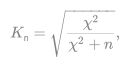

In [ ]:
def pirson(cont,df):
  chi2 = chi2_contingency(cont)[0]   #вычисляем значение хи-квадрат для таблицы сопряженности
  k = np.sqrt(chi2/(chi2+len(df)))   #используя значение хи-квадрат и размер выборки
  #вычисляем коэффициент Пирсона по формуле
  return k
pirson(cont,df)

0.04119568093767148

Коэффициент взаимной сопряженности Чупрова:

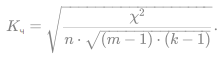

In [ ]:
def chuprov(cont,df):
  chi2 = chi2_contingency(cont)[0]    #вычисляем значение хи-квадрат для таблицы сопряженности
  k = np.sqrt(chi2 / (len(df) * np.sqrt((cont.shape[0]-1)*(cont.shape[1]-1))))   #вычисляем коэффициент Чупрова по формуле,
  #используя значение хи-квадрат, размер выборки и размерность таблицы
  return k

chuprov(cont,df)

0.017923837926295

Коэффициенты взаимной сопряженности Пирсона и Чупрова так же показали, что зависимости между признаками нет.